In [ ]:
using Pkg, IJulia
Pkg.activate(".")

In [ ]:
using FilePathsBase, Serialization
using MAT, Plots

In [ ]:
# Test
function load_ser_matrix(filename::String)
    open(filename, "r") do file
        return deserialize(file)
    end
end

In [65]:
parentCurDir = dirname(pwd())
inverted_files = joinpath(parentCurDir,"SRPBS_OPEN","data")
free_energy_reduced_files = joinpath(parentCurDir,"matlab_rDCM_inversion_code", "outputs_F")
subject_schizos = ["sub-0089", "sub-0091", "sub-0094", "sub-0095", "sub-0097", "sub-0098", "sub-0099", "sub-0100", "sub-0102", "sub-0103", "sub-0167", "sub-0191", "sub-0230"]
subject_controls = ["sub-0020", "sub-0021", "sub-0022", "sub-0023", "sub-0025", "sub-0026", "sub-0027", "sub-0030", "sub-0031", "sub-0032", "sub-0033", "sub-0034", "sub-0036", "sub-0037", "sub-0038", "sub-0039", "sub-0040"]
subject_pain = ["sub-1387", "sub-1388", "sub-1389", "sub-1391", "sub-1394", "sub-1395", "sub-1396", "sub-1397", "sub-1398", "sub-1399", "sub-1401", "sub-1403", "sub-1405", "sub-1408", "sub-1409", "sub-1410"]
subject_pain_controls = ["sub-1363", "sub-1364", "sub-1365", "sub-1366", "sub-1368", "sub-1369", "sub-1370", "sub-1371", "sub-1372", "sub-1373", "sub-1374", "sub-1375", "sub-1376", "sub-1377", "sub-1381", "sub-1382", "sub-1383", "sub-1384", "sub-1386"]
subject_oos_schizos = ["sub-0670", "sub-0671", "sub-0672", "sub-0674", "sub-0675", "sub-0676", "sub-0678", "sub-0679", "sub-0680", "sub-0681", "sub-0682", "sub-0683", "sub-0684", "sub-0685", "sub-0686", "sub-0687", "sub-0688"]
subject_oos_controls = ["sub-0715", "sub-0716", "sub-0717", "sub-0718", "sub-0720", "sub-0722", "sub-0723", "sub-0724", "sub-0726", "sub-0727", "sub-0728", "sub-0729", "sub-0731", "sub-0732", "sub-0733", "sub-0734", "sub-0735"]
rdcm_type = ["srdcm", "rdcm"]
sparsity = ["50", "25"]

2-element Vector{String}:
 "50"
 "25"

In [73]:
Fr_sub_list = []
Fr_srdcm_50 = []
Fr_srdcm_25 = []
Fr_rdcm = []
Fr_useful_rdcm = []

for (i, sub) in enumerate(subject_schizos)
    Fr_sub = Dict{Any,Any}()
    for mod in rdcm_type
        if mod == "rdcm"
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_25.mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat))
            Fr_rdcm = push!(Fr_rdcm, sum(free_energy_mat))
            continue
        end
        for p0 in sparsity
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_$(p0).mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F_$(p0)"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat)) 
            #mod_name = push!(mod_name, "$(sub)_$(mod)_F_$(p0)")
            if p0 == "50"
                Fr_srdcm_50 = push!(Fr_srdcm_50, sum(free_energy_mat))
            elseif p0 == "25"
                Fr_srdcm_25 = push!(Fr_srdcm_25, sum(free_energy_mat))
            end
        end
    end
    Fr_sub_list = push!(Fr_sub_list, Fr_sub)
    free_energy_mat = matread(joinpath(free_energy_reduced_files, "output_$(sub).mat"))
    Fr_useful_rdcm = push!(Fr_useful_rdcm, free_energy_mat["F"])
    # Plot for one subject
    # Save plot
end

@assert size(Fr_sub_list) == size(Fr_rdcm) == size(Fr_srdcm_50) == size(Fr_srdcm_25) == size(subject_schizos) == size(Fr_useful_rdcm)

In [81]:
Fr_sub_list_controls = []
Fr_srdcm_50_controls = []
Fr_srdcm_25_controls = []
Fr_rdcm_controls = []
Fr_useful_rdcm_controls = []

for (i,sub) in enumerate(subject_controls)
    Fr_sub = Dict{Any,Any}()
    for mod in rdcm_type
        if mod == "rdcm"
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_25.mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat))
            Fr_rdcm_controls = push!(Fr_rdcm_controls, sum(free_energy_mat))
            continue
        end
        for p0 in sparsity
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_$(p0).mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F_$(p0)"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat)) 
            #mod_name = push!(mod_name, "$(sub)_$(mod)_F_$(p0)")
            if p0 == "50"
                Fr_srdcm_50_controls = push!(Fr_srdcm_50_controls, sum(free_energy_mat))
            elseif p0 == "25"
                Fr_srdcm_25_controls = push!(Fr_srdcm_25_controls, sum(free_energy_mat))
            end
        end
    end
    Fr_sub_list_controls = push!(Fr_sub_list_controls, Fr_sub)
    
    free_energy_mat = matread(joinpath(free_energy_reduced_files, "output_$(sub).mat"))
    Fr_useful_rdcm_controls = push!(Fr_useful_rdcm_controls, free_energy_mat["F"])
    # Plot for one subject
    # Save plot
end

@assert size(Fr_sub_list_controls) == size(Fr_rdcm_controls) == size(Fr_srdcm_50_controls) == size(Fr_srdcm_25_controls) == size(subject_controls) == size(Fr_useful_rdcm_controls)

In [75]:
sub_schizos = []
for sub in subject_schizos
    sub_schizos = push!(sub_schizos, SubString(sub, 5, 8))
end
sub_controls = []
for sub in subject_controls
    sub_controls = push!(sub_controls, SubString(sub, 5, 8))
end

In [76]:
Fr_dict_schizos = Dict{Any,Any}("subject"=>sub_schizos, "rdcm_F"=>Fr_rdcm, "srdcm_F_25"=>Fr_srdcm_25, "srdcm_F_50"=>Fr_srdcm_50, "useful_rdcm_F"=>Fr_useful_rdcm)
Fr_dict_controls = Dict{Any,Any}("subject"=>sub_controls, "rdcm_F"=>Fr_rdcm_controls, "srdcm_F_25"=>Fr_srdcm_25_controls, "srdcm_F_50"=>Fr_srdcm_50_controls, "useful_rdcm_F"=>Fr_useful_rdcm_controls)

Dict{Any, Any} with 5 entries:
  "useful_rdcm_F" => Any[-9509.75, -9486.21, -9622.69, -9781.27, -9420.5, -1061…
  "srdcm_F_25"    => Any[-1.27468e5, -130578.0, -1.35319e5, -133631.0, -1.56996…
  "srdcm_F_50"    => Any[-1.28723e5, -1.31727e5, -1.3686e5, -1.34766e5, -1.5871…
  "subject"       => Any["0020", "0021", "0022", "0023", "0025", "0026", "0027"…
  "rdcm_F"        => Any[-1.4115e5, -1.45338e5, -1.49687e5, -147260.0, -170476.…

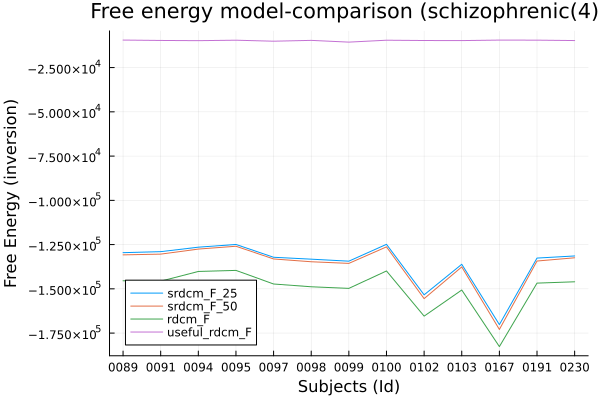

In [77]:
plot(Fr_dict_schizos["subject"], Fr_dict_schizos["srdcm_F_25"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_dict_schizos["subject"], Fr_dict_schizos["srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_dict_schizos["subject"], Fr_dict_schizos["rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F")
plot!(Fr_dict_schizos["subject"], Fr_dict_schizos["useful_rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_rdcm_F")
title!("Free energy model-comparison (schizophrenic(4))")

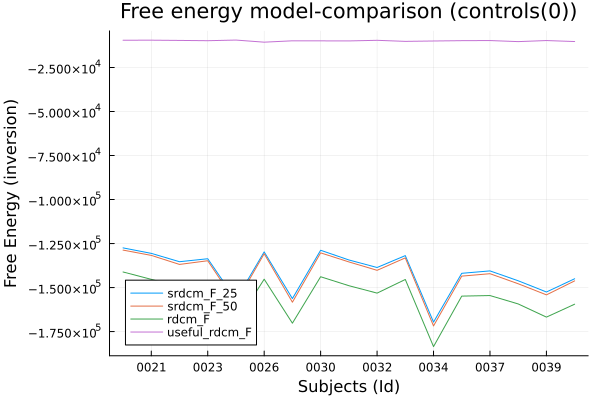

In [78]:
plot(Fr_dict_controls["subject"], Fr_dict_controls["srdcm_F_25"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_dict_controls["subject"], Fr_dict_controls["srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_dict_controls["subject"], Fr_dict_controls["rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F")
plot!(Fr_dict_controls["subject"], Fr_dict_controls["useful_rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_rdcm_F")
title!("Free energy model-comparison (controls(0))")

In [ ]:
Fr_sub_list_controls[1]

In [ ]:
plot(Fr_sub_list[1]["sub-0089_srdcm_F_25"], xlabel="Regions", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_sub_list[1]["sub-0089_srdcm_F_50"], xlabel="Regions", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_sub_list[1]["sub-0089_rdcm_F"], xlabel="Regions", ylabel="Free Energy (inversion)", label="rdcm_F")
title!("Free energy model-comparison (sub-0089)")

In [ ]:
plot(Fr_sub_list_controls[1]["sub-0020_srdcm_F_25"], xlabel="Regions", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_sub_list_controls[1]["sub-0020_srdcm_F_50"], xlabel="Regions", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_sub_list_controls[1]["sub-0020_rdcm_F"], xlabel="Regions", ylabel="Free Energy (inversion)", label="rdcm_F")
title!("Free energy model-comparison (sub-0020)")

In [ ]:
# back to chronic pain

In [59]:
Fr_sub_list_pain = []
Fr_srdcm_50_pain = []
Fr_useful_srdcm_50_pain = []
Fr_srdcm_25_pain = []
Fr_rdcm_pain = []
Fr_useful_rdcm_pain = []

for sub in subject_pain
    Fr_sub = Dict{Any,Any}()
    for mod in rdcm_type
        if mod == "rdcm"
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_25.mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat))
            Fr_rdcm_pain = push!(Fr_rdcm_pain, sum(free_energy_mat))
            
            free_energy_mat_useful = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_useful_$(mod)_F_50.mat"))
            filename_useful = "$(sub)_useful_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename_useful=>free_energy_mat_useful))
            Fr_useful_rdcm_pain = push!(Fr_useful_rdcm_pain, sum(free_energy_mat_useful))
            continue
        end
        for p0 in sparsity
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_$(p0).mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F_$(p0)"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat)) 
            #mod_name = push!(mod_name, "$(sub)_$(mod)_F_$(p0)")
            if p0 == "50"
                Fr_srdcm_50_pain = push!(Fr_srdcm_50_pain, sum(free_energy_mat))
                free_energy_mat_useful = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_useful_$(mod)_F_$(p0).mat"))
                filename_useful = "$(sub)_useful_$(mod)_F_$(p0)"
                Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename_useful=>free_energy_mat_useful))
                Fr_useful_srdcm_50_pain = push!(Fr_useful_srdcm_50_pain, sum(free_energy_mat_useful))
            elseif p0 == "25"
                Fr_srdcm_25_pain = push!(Fr_srdcm_25_pain, sum(free_energy_mat))
            end
        end
    end
    Fr_sub_list_pain = push!(Fr_sub_list_pain, Fr_sub)
    free_energy_mat = matread(joinpath(free_energy_reduced_files, "output_$(sub).mat"))
    Fr_useful_rdcm_controls = push!(Fr_useful_rdcm_controls, free_energy_mat["F"])
    # Plot for one subject
    # Save plot
end

@assert size(Fr_sub_list_pain) == size(Fr_rdcm_pain) == size(Fr_srdcm_50_pain) == size(Fr_srdcm_25_pain) == size(subject_pain) == size(Fr_useful_srdcm_50_pain) == size(Fr_useful_rdcm_pain)

In [60]:
Fr_sub_list_pain_controls = []
Fr_srdcm_50_pain_controls = []
Fr_useful_srdcm_50_pain_controls = []
Fr_srdcm_25_pain_controls = []
Fr_rdcm_pain_controls = []
Fr_useful_rdcm_pain_controls = []

for sub in subject_pain_controls
    Fr_sub = Dict{Any,Any}()
    for mod in rdcm_type
        if mod == "rdcm"
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_25.mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat))
            Fr_rdcm_pain_controls = push!(Fr_rdcm_pain_controls, sum(free_energy_mat))
            
            free_energy_mat_useful = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_useful_$(mod)_F_50.mat"))
            filename_useful = "$(sub)_useful_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename_useful=>free_energy_mat_useful))
            Fr_useful_rdcm_pain_controls = push!(Fr_useful_rdcm_pain_controls, sum(free_energy_mat_useful))
            continue
        end
        for p0 in sparsity
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_$(p0).mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F_$(p0)"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat)) 
            #mod_name = push!(mod_name, "$(sub)_$(mod)_F_$(p0)")
            if p0 == "50"
                Fr_srdcm_50_pain_controls = push!(Fr_srdcm_50_pain_controls, sum(free_energy_mat))
                free_energy_mat_useful = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_useful_$(mod)_F_$(p0).mat"))
                filename_useful = "$(sub)_useful_$(mod)_F_$(p0)"
                Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename_useful=>free_energy_mat_useful))
                Fr_useful_srdcm_50_pain_controls = push!(Fr_useful_srdcm_50_pain_controls, sum(free_energy_mat_useful))
            elseif p0 == "25"
                Fr_srdcm_25_pain_controls = push!(Fr_srdcm_25_pain_controls, sum(free_energy_mat))
            end
        end
    end
    Fr_sub_list_pain_controls = push!(Fr_sub_list_pain_controls, Fr_sub)
    free_energy_mat = matread(joinpath(free_energy_reduced_files, "output_$(sub).mat"))
    Fr_useful_rdcm_controls = push!(Fr_useful_rdcm_controls, free_energy_mat["F"])
    # Plot for one subject
    # Save plot
end

@assert size(Fr_sub_list_pain_controls) == size(Fr_rdcm_pain_controls) == size(Fr_srdcm_50_pain_controls) == size(Fr_srdcm_25_pain_controls) == size(subject_pain_controls) == size(Fr_useful_srdcm_50_pain_controls) == size(Fr_useful_rdcm_pain_controls)

In [61]:
sub_pain = []
for sub in subject_pain
    sub_pain = push!(sub_pain, SubString(sub, 5, 8))
end
sub_pain_controls = []
for sub in subject_pain_controls
    sub_pain_controls = push!(sub_pain_controls, SubString(sub, 5, 8))
end

In [62]:
Fr_dict_pain = Dict{Any,Any}("subject"=>sub_pain, "rdcm_F"=>Fr_rdcm_pain, "srdcm_F_25"=>Fr_srdcm_25_pain, "srdcm_F_50"=>Fr_srdcm_50_pain, "useful_srdcm_F_50"=>Fr_useful_srdcm_50_pain, "useful_rdcm_F"=>Fr_useful_rdcm_pain)
Fr_dict_pain_controls = Dict{Any,Any}("subject"=>sub_pain_controls, "rdcm_F"=>Fr_rdcm_pain_controls, "srdcm_F_25"=>Fr_srdcm_25_pain_controls, "srdcm_F_50"=>Fr_srdcm_50_pain_controls, "useful_srdcm_F_50"=>Fr_useful_srdcm_50_pain_controls, "useful_rdcm_F"=>Fr_useful_rdcm_pain_controls)

Dict{Any, Any} with 6 entries:
  "useful_rdcm_F"     => Any[-80646.3, -63273.6, -85169.6, -89949.0, -87685.6, …
  "srdcm_F_25"        => Any[-149862.0, -1.10732e5, -1.59362e5, -1.67779e5, -1.…
  "srdcm_F_50"        => Any[-1.5163e5, -1.11673e5, -1.61544e5, -1.70229e5, -1.…
  "useful_srdcm_F_50" => Any[-75232.6, -56356.7, -79299.6, -83699.0, -82236.1, …
  "subject"           => Any["1363", "1364", "1365", "1366", "1368", "1369", "1…
  "rdcm_F"            => Any[-1.62373e5, -1.27066e5, -1.72198e5, -1.81902e5, -1…

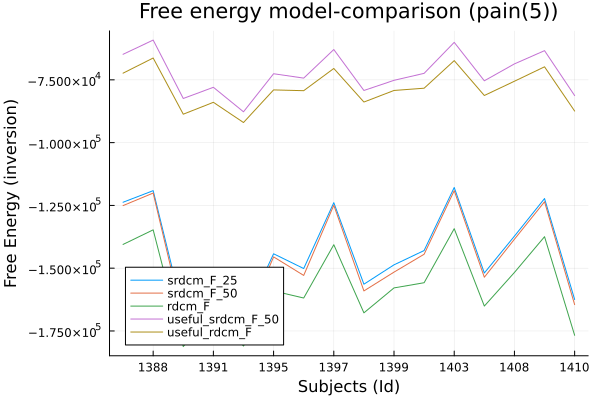

In [63]:
plot(Fr_dict_pain["subject"], Fr_dict_pain["srdcm_F_25"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_dict_pain["subject"], Fr_dict_pain["srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_dict_pain["subject"], Fr_dict_pain["rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F")
plot!(Fr_dict_pain["subject"], Fr_dict_pain["useful_srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_srdcm_F_50")
plot!(Fr_dict_pain["subject"], Fr_dict_pain["useful_rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_rdcm_F")
title!("Free energy model-comparison (pain(5))")

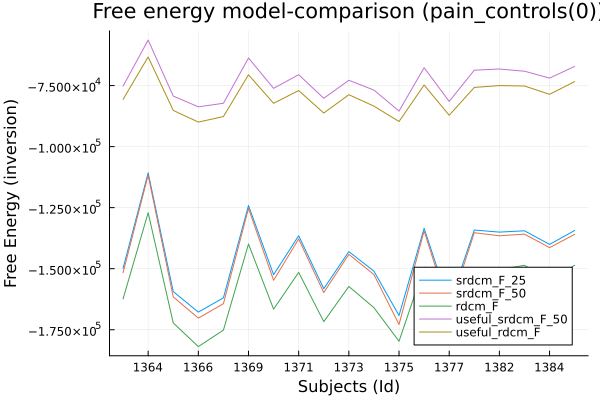

In [64]:
plot(Fr_dict_pain_controls["subject"], Fr_dict_pain_controls["srdcm_F_25"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_dict_pain_controls["subject"], Fr_dict_pain_controls["srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_dict_pain_controls["subject"], Fr_dict_pain_controls["rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F")
plot!(Fr_dict_pain_controls["subject"], Fr_dict_pain_controls["useful_srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_srdcm_F_50")
plot!(Fr_dict_pain_controls["subject"], Fr_dict_pain_controls["useful_rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_rdcm_F")
title!("Free energy model-comparison (pain_controls(0))")

In [ ]:
# Oos schizos
Fr_sub_list_oos = []
Fr_srdcm_50_oos = []
Fr_srdcm_25_oos = []
Fr_rdcm_jl_oos = []
Fr_rdcm_mat_oos = []
Fr_useful_rdcm_oos = []

mat_idx = ["1","2","3","5","6","7","9","10","11","12","13","14","15","16","17","18","20"]
oos_inverted_files_useful_mat = "/cluster/scratch/spruthi/project4/all_outputs_oos/output_schizos_reduced"

for (i, sub) in enumerate(subject_oos_schizos)
    Fr_sub = Dict{Any,Any}()
    for mod in rdcm_type
        if mod == "rdcm"
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_25.mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat))
            Fr_rdcm_jl_oos = push!(Fr_rdcm_jl_oos, sum(free_energy_mat))
            continue
        end
        for p0 in sparsity
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_$(p0).mat"))
            filename = "$(sub)_$(mod)_F_$(p0)"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat)) 
            #mod_name = push!(mod_name, "$(sub)_$(mod)_F_$(p0)")
            if p0 == "50"
                Fr_srdcm_50_oos = push!(Fr_srdcm_50_oos, sum(free_energy_mat))
            elseif p0 == "25"
                Fr_srdcm_25_oos = push!(Fr_srdcm_25_oos, sum(free_energy_mat))
            end
        end
    end
    Fr_sub_list_oos = push!(Fr_sub_list_oos, Fr_sub)
    
    free_energy_mat = matread(joinpath(free_energy_reduced_files, "output_$(sub).mat"))
    #free_energy_mat = free_energy_mat.F
    Fr_rdcm_mat_oos = push!(Fr_rdcm_mat_oos, free_energy_mat["F"])
    
    free_energy_mat = matread(joinpath(oos_inverted_files_useful_mat, "outputs_reduceds$(mat_idx[i]).mat"))
    #free_energy_mat = free_energy_mat.F
    Fr_useful_rdcm_oos = push!(Fr_useful_rdcm_oos, free_energy_mat["output"]["logF"])
    # Plot for one subject
    # Save plot
end

@assert size(Fr_sub_list_oos) == size(Fr_rdcm_jl_oos) == size(Fr_srdcm_50_oos) == size(Fr_srdcm_25_oos) == size(subject_oos_schizos) == size(Fr_useful_rdcm_oos) == size(Fr_rdcm_mat_oos)

In [ ]:
Fr_sub_list_oos_controls = []
Fr_srdcm_50_oos_controls = []
Fr_srdcm_25_oos_controls = []
Fr_rdcm_jl_oos_controls = []
Fr_rdcm_mat_oos_controls = []
Fr_useful_rdcm_oos_controls = []

mat_idx_controls = ["1","2","3","4","6","8","9","10","12","13","14","15","17","18","19","20","21"]
oos_inverted_files_useful_controls_mat = "/cluster/scratch/spruthi/project4/all_outputs_oos/outputs_controls_reduced"

for (i, sub) in enumerate(subject_oos_controls)
    Fr_sub = Dict{Any,Any}()
    for mod in rdcm_type
        if mod == "rdcm"
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_25.mat"))
            #println(size(free_energy_mat))
            filename = "$(sub)_$(mod)_F"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat))
            Fr_rdcm_jl_oos_controls = push!(Fr_rdcm_jl_oos_controls, sum(free_energy_mat))
            continue
        end
        for p0 in sparsity
            free_energy_mat = load_ser_matrix(joinpath(inverted_files, sub, "sparseInversion", "$(sub)_$(mod)_F_$(p0).mat"))
            filename = "$(sub)_$(mod)_F_$(p0)"
            Fr_sub = merge!(Fr_sub, Dict{Any,Any}(filename=>free_energy_mat)) 
            #mod_name = push!(mod_name, "$(sub)_$(mod)_F_$(p0)")
            if p0 == "50"
                Fr_srdcm_50_oos_controls = push!(Fr_srdcm_50_oos_controls, sum(free_energy_mat))
            elseif p0 == "25"
                Fr_srdcm_25_oos_controls = push!(Fr_srdcm_25_oos_controls, sum(free_energy_mat))
            end
        end
    end
    Fr_sub_list_oos_controls = push!(Fr_sub_list_oos_controls, Fr_sub)
    
    free_energy_mat = matread(joinpath(free_energy_reduced_files, "output_$(sub).mat"))
    #free_energy_mat = free_energy_mat.F
    Fr_rdcm_mat_oos_controls = push!(Fr_rdcm_mat_oos_controls, free_energy_mat["F"])
    
    free_energy_mat = matread(joinpath(oos_inverted_files_useful_controls_mat, "outputs_reducedDCM_$(SubString(sub, 5, 8)).mat"))
    #free_energy_mat = free_energy_mat.F
    Fr_useful_rdcm_oos_controls = push!(Fr_useful_rdcm_oos_controls, free_energy_mat["output"]["logF"])
    # Plot for one subject
    # Save plot
end

@assert size(Fr_sub_list_oos_controls) == size(Fr_rdcm_jl_oos_controls) == size(Fr_srdcm_50_oos_controls) == size(Fr_srdcm_25_oos_controls) == size(subject_oos_controls) == size(Fr_useful_rdcm_oos_controls) == size(Fr_rdcm_mat_oos_controls)

In [ ]:
sub_oos = []
for sub in subject_oos_schizos
    sub_oos = push!(sub_oos, SubString(sub, 5, 8))
end
sub_oos_controls = []
for sub in subject_oos_controls
    sub_oos_controls = push!(sub_oos_controls, SubString(sub, 5, 8))
end

In [ ]:
Fr_dict_oos = Dict{Any,Any}("subject"=>sub_oos, "rdcm_F_jl"=>Fr_rdcm_jl_oos, "srdcm_F_25"=>Fr_srdcm_25_oos, "srdcm_F_50"=>Fr_srdcm_50_oos, "useful_rdcm_F"=>Fr_useful_rdcm_oos, "rdcm_F_mat"=>Fr_rdcm_mat_oos)
Fr_dict_oos_controls = Dict{Any,Any}("subject"=>sub_oos_controls, "rdcm_F_jl"=>Fr_rdcm_jl_oos_controls, "srdcm_F_25"=>Fr_srdcm_25_oos_controls, "srdcm_F_50"=>Fr_srdcm_50_oos_controls, "useful_rdcm_F"=>Fr_useful_rdcm_oos_controls, "rdcm_F_mat"=>Fr_rdcm_mat_oos_controls)

In [ ]:
plot(Fr_dict_oos["subject"], Fr_dict_oos["srdcm_F_25"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_dict_oos["subject"], Fr_dict_oos["srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_dict_oos["subject"], Fr_dict_oos["rdcm_F_jl"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F_jl")
plot!(Fr_dict_oos["subject"], Fr_dict_oos["useful_rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_rdcm_F")
plot!(Fr_dict_oos["subject"], Fr_dict_oos["rdcm_F_mat"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F_mat")
title!("Free energy model-comparison (oos schizo(5))")

In [ ]:
plot(Fr_dict_oos_controls["subject"], Fr_dict_oos_controls["srdcm_F_25"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_25")
plot!(Fr_dict_oos_controls["subject"], Fr_dict_oos_controls["srdcm_F_50"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="srdcm_F_50")
plot!(Fr_dict_oos_controls["subject"], Fr_dict_oos_controls["rdcm_F_jl"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F_jl")
plot!(Fr_dict_oos_controls["subject"], Fr_dict_oos_controls["useful_rdcm_F"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="useful_rdcm_F")
plot!(Fr_dict_oos_controls["subject"], Fr_dict_oos_controls["rdcm_F_mat"], xlabel="Subjects (Id)", ylabel="Free Energy (inversion)", label="rdcm_F_mat")
title!("Free energy model-comparison (oos control(5))")